<a href="https://colab.research.google.com/github/aysha30/Linear_Regression_by_TSF/blob/main/tsf_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  👩‍💻Prediction using Supervised ML 👨‍💻

## 1. Problem Statement
Predict the percentage of an student based on the no. of study hours.

## 2. Data
Data is downloaded from : https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv


**By:**
  Aysha Yazdani 

**Task by:**
  The Spark Foundation 

In [1]:
# importing necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Getting data ready

data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data imported!!!")
data.head()

Data imported!!!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
# Checking for missing data
data.isna().sum()

Hours     0
Scores    0
dtype: int64

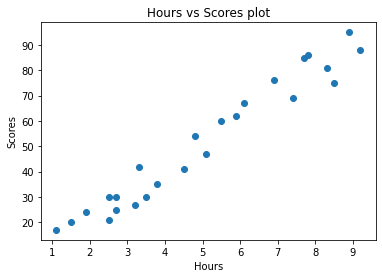

In [5]:
fig, ax = plt.subplots()
ax.scatter(data['Hours'], data['Scores'])
ax.set(title="Hours vs Scores plot",
       xlabel="Hours",
       ylabel="Scores");

From the graph above, we can clearly see that there is a positive linear relation between the number of hours and scores.

In [6]:
#  Split into x/y
x = data.drop("Scores", axis=1)
y = data["Scores"]


In [7]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [8]:
 y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [10]:
# Model Selection
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model = RandomForestRegressor(n_estimators=100).fit(x_train, y_train)

In [11]:
model.score(x_test, y_test)

0.9778294466160586

### Regression model evaluation  metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. Mean absolute error (MAE)
2. Mean squared error (MSE)



**Mean Absolute Error (MAE)**

MAE is the average of the absolute difference between predictions and actual values. It gives you an idea of how wrong your models prediction are.

In [12]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.778

In [13]:
# Manually applying MAE
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df["Differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,Differences
8,81,80.300000,-0.700000
16,30,27.425833,-2.574167
0,21,27.425833,6.425833
23,76,71.900000,-4.100000
11,62,62.090000,0.090000


In [14]:
abs(df["Differences"]).mean()

2.778

**Mean Squared Error (MSE)**

In [15]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)

mse= mean_squared_error(y_test, y_preds)
mse

13.045153611111104

In [16]:
# Calcuate mse manually
squared = np.square(df["Differences"])
squared.mean()

13.045153611111104

### THANK YOU 👏